In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
bird = pd.read_csv('./bird_tracking.csv')

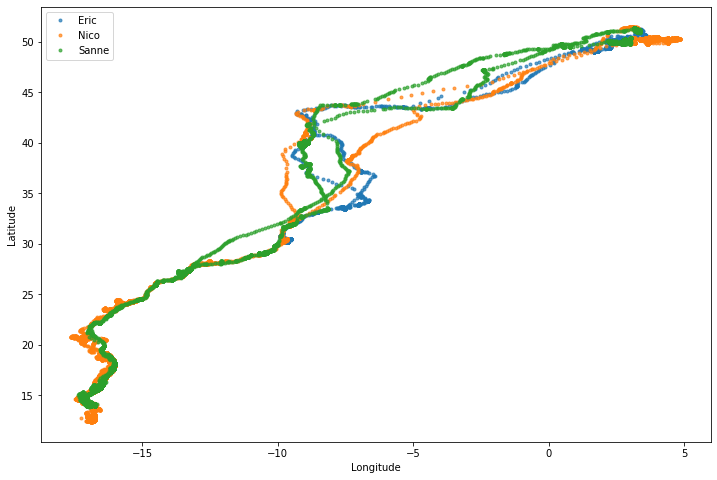

In [6]:
plt.figure(figsize=(12,8))
    
bird_names = bird.bird_name.unique()
for name in bird_names:
    ix = bird.bird_name == name
    x, y = bird.longitude[ix], bird.latitude[ix]
    plt.plot(x, y, ".", label=name, alpha=.7)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc="upper left")

### Bird speed

In [ ]:
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(15, 5) )
for i, name in enumerate(bird_names):
    ix = bird.bird_name == name
    speed = bird.speed_2d[ix]
    speed.dropna(inplace=True)
    axs[i].figsize=(12,8)
    axs[i].hist(speed, label=name, bins=100)
    axs[i].set_xlabel(name)
    

In [ ]:
bird.columns

In [ ]:
import datetime

In [ ]:
# datetime.datetime.strptime(bird.date_time[0:5][:-3], "%Y-%m-%d %H:%M:%S")
bird["timestamp"] = bird.apply(lambda df: datetime.datetime.strptime(df.date_time[:-3], "%Y-%m-%d %H:%M:%S"), axis=1)
bird["elapsed_time"] = bird.apply(lambda df: df.timestamp - bird.timestamp[0], axis=1)
bird["elapsed_time_in_days"] = bird.apply(lambda df: (df.timestamp - bird.timestamp[0]) / datetime.timedelta(days=1), axis=1)



In [ ]:
plt.figure(figsize=(12,8))
    
bird_names = bird.bird_name.unique()
for name in bird_names:
    ix = bird.bird_name == name
    x, y = bird["elapsed_time"][ix], bird["timestamp"][ix]
    plt.plot(x, label=name, alpha=.7)
plt.xlabel("Observation")
plt.ylabel("Elapsed time")
plt.legend(loc="upper left")

### 4.2.5: Calculating Daily Mean Speed

In [ ]:
next_day = 1
inds = []
daily_mean_speed = []
data = bird[bird.bird_name == 'Eric']
for i,t in enumerate(data.elapsed_time_in_days):
    if t < next_day:
        inds.append(i)
    else:
        daily_mean_speed.append(np.mean(data.speed_2d[inds]))
        next_day += 1
        inds = []
        
plt.figure(figsize=(15,8))
plt.plot(daily_mean_speed)
plt.xlabel("Day")
plt.ylabel("Mean speed (m/s)")

In [ ]:
sanne = bird[bird.bird_name == 'Sanne']
np.min(sanne.timestamp)
bird.bird_name.unique()

In [ ]:
!pip install geos 

In [1]:
!conda install -c conda-forge cartopy -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.11.0
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /Users/beltre.wilton/sds/PH526x/venv

  added / updated specs:
    - cartopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.6.15  |       h4653dfc_0         149 KB  conda-forge
    cartopy-0.20.2             |   py38hc025e64_5         1.6 MB  conda-forge
    certifi-2022.6.15          |   py38h10201cd_0         155 KB  conda-forge
    geos-3.10.3                |       h9a09cb3_0         1.3 MB  conda-forge
    libcurl-7.83.1             |       h7965298_0         301 KB  conda-forge
    proj-9.0.0                 |       hb719e4a_1         2.7 MB  conda-forge
    pyproj-3.3.1               |   py38h086cae7_0         434 KB  c

In [12]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

proj = ccrs.Mercator()

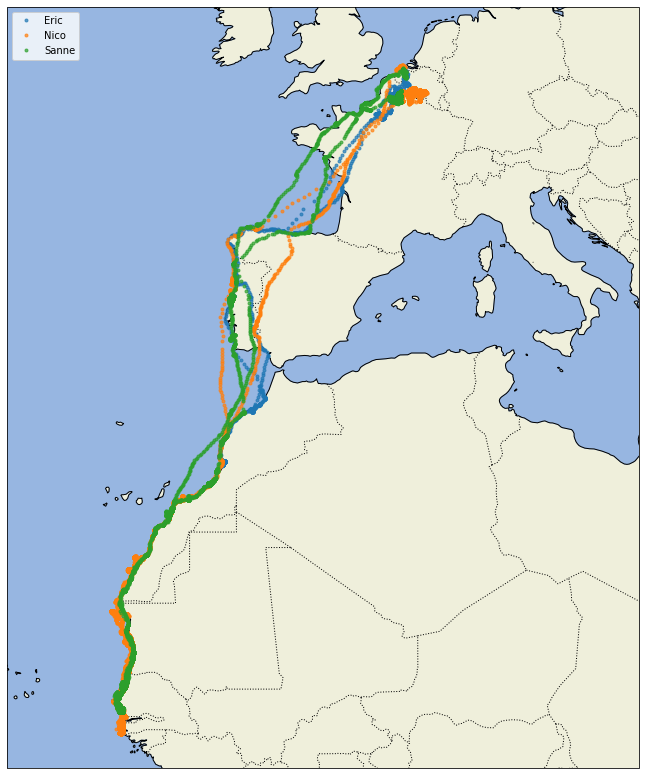

In [16]:
plt.figure(figsize=(20,14))
ax = plt.axes(projection=proj)
ax.set_extent((-25., 20., 52., 10.))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

bird_names = bird.bird_name.unique()
for name in bird_names:
    ix = bird.bird_name == name
    x, y = bird.longitude[ix], bird.latitude[ix]
    plt.plot(x, y, ".", transform=ccrs.Geodetic(), label=name, alpha=.7)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc="upper left")